In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [222]:
sector = pd.read_csv('10_Industry_Portfolios.CSV', header=6, index_col=0, dtype='a')
sector = sector.iloc[:1127, :]


In [223]:
sector.index = pd.to_datetime(sector.index, format='%Y%m')
sector.index = sector.index.to_period('M')
sector.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1926-07,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.16
1926-08,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.38
1926-09,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29
1926-10,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.85
1926-11,5.20,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11


In [6]:
sample = sector['1964-01':'2014-12']
sample = sample.astype('float')
sample

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
1964-01,0.79,1.19,2.69,4.84,2.91,3.35,2.51,3.68,1.40,1.24
1964-02,1.87,2.14,2.76,1.06,1.96,-0.28,1.62,1.66,0.87,5.45
1964-03,3.08,0.93,3.70,1.40,3.38,-0.94,2.43,-1.94,-0.75,2.18
1964-04,-0.48,1.93,-1.72,4.02,-3.63,0.81,2.86,-1.42,1.06,0.26
1964-05,1.56,1.12,1.77,2.14,2.74,-0.40,3.89,0.53,0.84,2.42
...,...,...,...,...,...,...,...,...,...,...
2014-08,5.54,5.20,4.77,2.27,4.28,0.52,5.15,5.43,5.39,4.41
2014-09,-0.08,-9.42,-2.37,-8.01,-1.30,-1.71,-1.43,-0.08,-3.40,-1.01
2014-10,2.64,3.86,2.35,-4.44,1.31,1.41,3.03,5.76,6.69,3.30
2014-11,4.79,4.74,2.23,-9.87,4.25,3.04,7.46,2.66,0.29,2.73


In [267]:
factors = pd.read_csv('F-F_Research_Data_5_Factors_2x3.CSV', header=2, index_col=0)
factors = factors.iloc[:683, :]
factors = factors.astype('float')
factors.index = pd.to_datetime(factors.index, format='%Y%m')
factors.index = factors.index.to_period('M')

In [268]:
factors_insample = factors['1964-01':'2014-12']
factors_insample

,Mkt-RF,SMB,HML,RMW,CMA,RF
1964-01,2.24,0.08,1.59,0.22,1.50,0.30
1964-02,1.54,0.32,2.83,0.06,0.85,0.26
1964-03,1.41,1.41,3.32,-2.01,2.93,0.31
1964-04,0.10,-1.52,-0.55,-1.35,-1.08,0.29
1964-05,1.42,-0.68,1.98,-0.26,0.24,0.26
...,...,...,...,...,...,...
2014-08,4.24,0.29,-0.59,-0.63,-0.70,0.00
2014-09,-1.97,-3.79,-1.23,1.13,-0.51,0.00
2014-10,2.52,3.78,-1.70,-0.47,-0.17,0.00
2014-11,2.55,-2.31,-3.00,1.40,0.18,0.00


In [92]:
excess_return = sample.apply(lambda x: x - factors_insample.iloc[:, -1])
mean = excess_return.mean()
std = excess_return.std()

In [360]:
skeness = excess_return.skew()
kurtosis = excess_return.kurtosis() + 3

In [361]:
import statsmodels.api as sm
from scipy.stats import skewtest, kurtosistest

z, p_skewness = skewtest(excess_return, axis=0)
z, p_kurtosis = kurtosistest(excess_return, axis=0)

sign_skew = pd.Series(['']*len(z))
sign_skew[p_skewness<0.01] = '*'*3
sign_skew[(p_skewness>=0.01)&(p_skewness<0.05)] = '*'*2
sign_skew[(p_skewness>=0.05)&(p_skewness<0.1)] = '*'

sign_kur = pd.Series(['']*len(z))
sign_kur[p_kurtosis<0.01] = '*'*3
sign_kur[(p_kurtosis>=0.01)&(p_kurtosis<0.05)] = '*'*2
sign_kur[(p_kurtosis>=0.05)&(p_kurtosis<0.1)] = '*'

In [363]:
stats = pd.DataFrame()
for i in range(10):
    stat = pd.DataFrame(data={'Sector Portfolio': excess_return.columns[i], 
                              'Mean': mean[i], 'SD': std[i], 'Coefficient of Skewness': '{:.4f}{}({:.4f})'.format(skeness[i], sign_skew[i], p_skewness[i]),
                               'Coefficient of Kurtosis': '{:.4f}{}({:.4f})'.format(kurtosis[i], sign_kur[i], p_kurtosis[i])}, index=[''])
    stats = stats.append(stat)

In [367]:
print('=====================================================================')
print('                     Descriptive Statistics')
print('=====================================================================')

stats

                     Descriptive Statistics


,Sector Portfolio,Mean,SD,Coefficient of Skewness,Coefficient of Kurtosis
,NoDur,0.682990,4.303136,-0.3156***(0.0017),5.1361***(0.0000)
,Durbl,0.455621,6.335915,0.1598(0.1053),7.9583***(0.0000)
,Manuf,0.572190,4.967849,-0.4961***(0.0000),5.6246***(0.0000)
,Enrgy,0.640261,5.418015,-0.0083(0.9324),4.4359***(0.0000)
,HiTec,0.570343,6.532117,-0.2252**(0.0233),4.3122***(0.0000)
,Telcm,0.457696,4.654033,-0.1890*(0.0561),4.2773***(0.0000)
,Shops,0.638431,5.224537,-0.2929***(0.0034),5.4514***(0.0000)
,Hlth,0.688023,4.869590,0.0173(0.8598),5.5476***(0.0000)
,Utils,0.451438,4.046342,-0.1160(0.2383),4.0395***(0.0002)
,Other,0.537026,5.330422,-0.4868***(0.0000),4.8472***(0.0000)


<img src="stats.png" width=600 height=300 />

In [400]:
factors_insample.iloc[0:36, :5]

,Mkt-RF,SMB,HML,RMW,CMA
1964-01,2.24,0.08,1.59,0.22,1.50
1964-02,1.54,0.32,2.83,0.06,0.85
1964-03,1.41,1.41,3.32,-2.01,2.93
1964-04,0.10,-1.52,-0.55,-1.35,-1.08
1964-05,1.42,-0.68,1.98,-0.26,0.24
1964-06,1.27,0.09,0.68,-0.42,0.14
1964-07,1.74,0.53,0.68,0.14,1.84
1964-08,-1.44,0.30,0.09,0.06,0.36
1964-09,2.69,-0.31,1.65,-0.48,0.58
1964-10,0.59,0.88,1.14,-0.29,0.48


In [401]:
def factor_bt(asset, window=36, num_factor=5):
    n = len(excess_return)-window
    alphas = []
    for i in range(n):
        X = sm.add_constant(factors_insample.iloc[i:(i+window), :num_factor]/100)
        y = excess_return.iloc[i:(i+window), asset]/100

        model = sm.OLS(y, X)
        results = model.fit()
        coef = results.params.values
        
        intercept = coef[0]
        
        #alpha = (intercept + 1)**12 - 1
        
        alphas.append(intercept)
    
    return np.array(alphas)

In [402]:
ff5_results = pd.DataFrame()
for i in range(10):
    alpha = factor_bt(i)
    mean = np.mean(alpha)
    std = np.std(alpha)
    ff5_result = pd.DataFrame(data={'Sector Portfolio': excess_return.columns[i], 
                              'Mean(%)': '{:.2%}'.format(mean),
                              'SD(%)': '{:.2%}'.format(std)},
                        index = [''])
    ff5_results = ff5_results.append(ff5_result)

In [399]:
ff5_results

,Sector Portfolio,Mean(%),SD(%)
,NoDur,-7.47%,42.71%
,Durbl,-23.50%,55.34%
,Manuf,-4.74%,36.39%
,Enrgy,0.06%,73.15%
,HiTec,41.06%,65.41%
,Telcm,-13.09%,54.79%
,Shops,1.44%,38.49%
,Hlth,38.07%,42.37%
,Utils,-3.18%,51.86%
,Other,-8.50%,26.94%


<img src="FF5_results.png" width=500 height=200 />

In [139]:
import statsmodels.api as sm

<IPython.core.display.Javascript object>


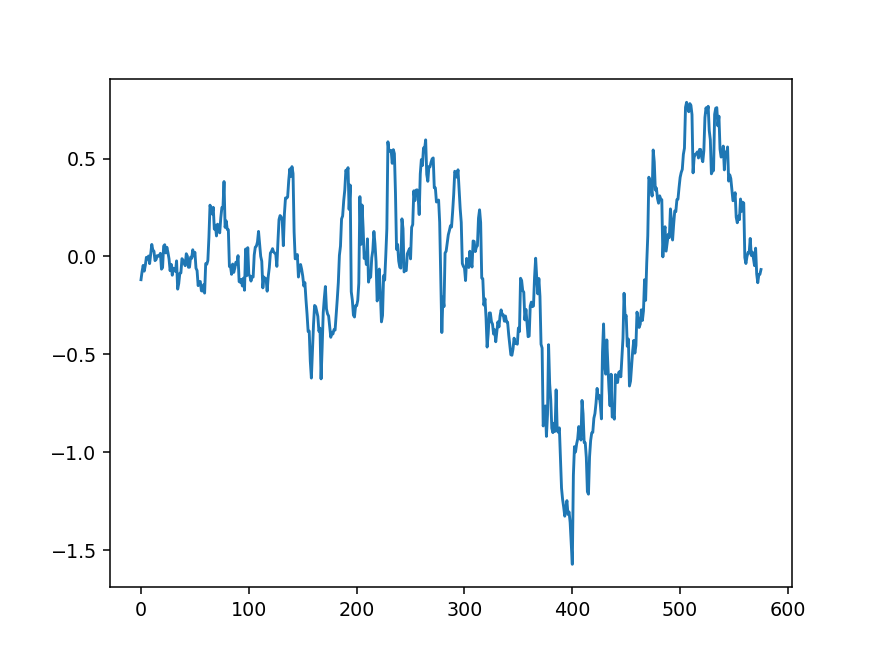

In [388]:
plt.figure()
plt.plot(alphas_0*100)

In [395]:
reg_results = pd.DataFrame()
for i in range(10):
    X = sm.add_constant(factors_insample.iloc[:, :3]/100)
    y = excess_return.iloc[:, i]/100

    model = sm.OLS(y, X)
    results = model.fit()
    params = results.params
    pvalues = results.pvalues.values
    
    alpha = params[0]
    #alpha = (1 + params[0])**12 - 1
    sign = pd.Series(['']*4)
    sign[pvalues<0.01] = '*'*3
    sign[(pvalues>=0.01)&(pvalues<0.05)] = '*'*2
    sign[(pvalues>=0.05)&(pvalues<0.1)] = '*'
    
    reg_result = pd.DataFrame(data = {'Sector Portfolio': excess_return.columns[i], 'Alpha': '{:.4f}{}({:.3f})'.format(alpha*100, sign[0], pvalues[0]), 
                               'Market Beta': '{:.4f}{}({:.3f})'.format(params[1], sign[1], pvalues[1]),
                                'SMB Beta': '{:.4f}{}({:.3f})'.format(params[2], sign[2], pvalues[2]),
                                'HML Beta': '{:.4f}{}({:.3f})'.format(params[3], sign[3], pvalues[3]),
                               'Adj R-Squared': '{:.2%}'.format(results.rsquared_adj)}, index = [''])
    reg_results = reg_results.append(reg_result, ignore_index=True)

In [396]:
#results.summary()
reg_results.index = ['']*len(reg_results)
print('==================================================================================')
print('         Regression of 3 factor model with ten sector portfolios')
print('==================================================================================')
reg_results

         Regression of 3 factor model with ten sector portfolios


,Sector Portfolio,Alpha,Market Beta,SMB Beta,HML Beta,Adj R-Squared
,NoDur,0.2237**(0.022),0.8316***(0.000),-0.0348(0.283),0.1404***(0.000),70.03%
,Durbl,-0.3925***(0.006),1.2046***(0.000),0.1543***(0.001),0.5445***(0.000),70.72%
,Manuf,-0.0280(0.688),1.0623***(0.000),0.0294(0.204),0.1600***(0.000),88.52%
,Enrgy,0.1748(0.289),0.8765***(0.000),-0.2093***(0.000),0.2282***(0.000),45.76%
,HiTec,0.1730(0.144),1.1143***(0.000),0.2057***(0.000),-0.5948***(0.000),80.81%
,Telcm,0.0474(0.704),0.8394***(0.000),-0.2082***(0.000),0.1283***(0.004),58.00%
,Shops,0.0919(0.395),0.9867***(0.000),0.1412***(0.000),0.0328(0.398),75.00%
,Hlth,0.4451***(0.000),0.8276***(0.000),-0.2365***(0.000),-0.2884***(0.000),62.72%
,Utils,0.0391(0.757),0.6310***(0.000),-0.1735***(0.000),0.3913***(0.000),42.87%
,Other,-0.2040***(0.003),1.1595***(0.000),0.0625***(0.007),0.3848***(0.000),90.03%


<img src="FF3_results.png" width=600 height=300 />